In [17]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import IPython as ip
from pathlib import Path
import librosa
import cv2
import numpy as np

In [25]:
path='./predict'
a=os.listdir(path)

In [ ]:
import os
import wave
spectogram_path=Path('./predict/image/')
import pylab
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    #pylab.title('spectrogram of %r' % wav_file)
    _=pylab.specgram(sound_info, Fs=frame_rate)
    filename=spectogram_path/Path(wav_file).name.replace('.wav','.png')
    pylab.savefig(filename)
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

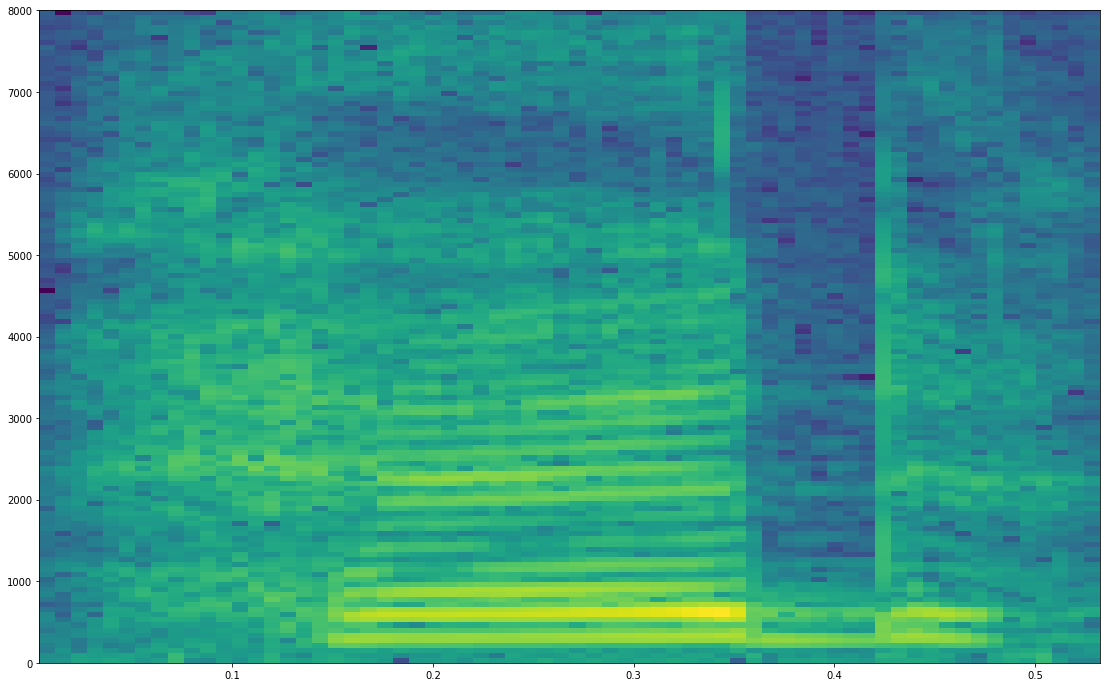

In [28]:
graph_spectrogram(path+'/'+a[0])

In [29]:
path='./predict/image'
a=os.listdir(path)
image=cv2.imread(path+'/'+a[0],cv2.IMREAD_COLOR)
image=cv2.resize(image,(150,150))
predicters=np.array(image).reshape(1,150,150,3)

In [30]:
y = np.array(predicters)
y = y/255

In [31]:
from keras.models import load_model
model=load_model('./model.h5')

In [32]:
ans=model.predict(y)

In [33]:
if ans[0][0]>ans[0][1]:
    print('adult')
else:
    print('child')

child
